In [1]:
# --- Imports ---
import sys,os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import struct
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import uniform
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import math
from geopandas import GeoDataFrame, GeoSeries
import geopandas as gpd
from shapely.geometry import Polygon, Point, LineString
from descartes import PolygonPatch
from matplotlib.collections import PatchCollection
import shapely
import datetime
%matplotlib inline

In [2]:
mons = pd.read_csv('./data/pokemon.csv', skiprows=1, usecols=[3,4,5,6], names=["num", "lat", "lng", "time"], low_memory=False)
mons.last_valid_index()

7314094

In [36]:
times = mons['time'].map(lambda x: datetime.datetime.utcfromtimestamp(x*10))
hours = times.map(lambda x: x.hour)
mins = times.map(lambda x: x.minute)
d = {'hour': hours, 'minute': mins}
df = pd.DataFrame(data=d)
df['c'] = df.groupby('hour')['minute'].transform(pd.Series.value_counts)
df = df.drop_duplicates(('hour', 'minute'))
df

,hour,minute,c
0,18,19,10773
1,13,0,7720
2,12,59,8589
3,12,55,8528
4,13,2,7625
5,13,3,7602
7,12,56,8413
9,21,53,333516
10,4,36,9240
11,13,4,7373


In [40]:
pivoted=df.pivot('hour', 'minute', 'c').clip(0,df.c.quantile(0.999))

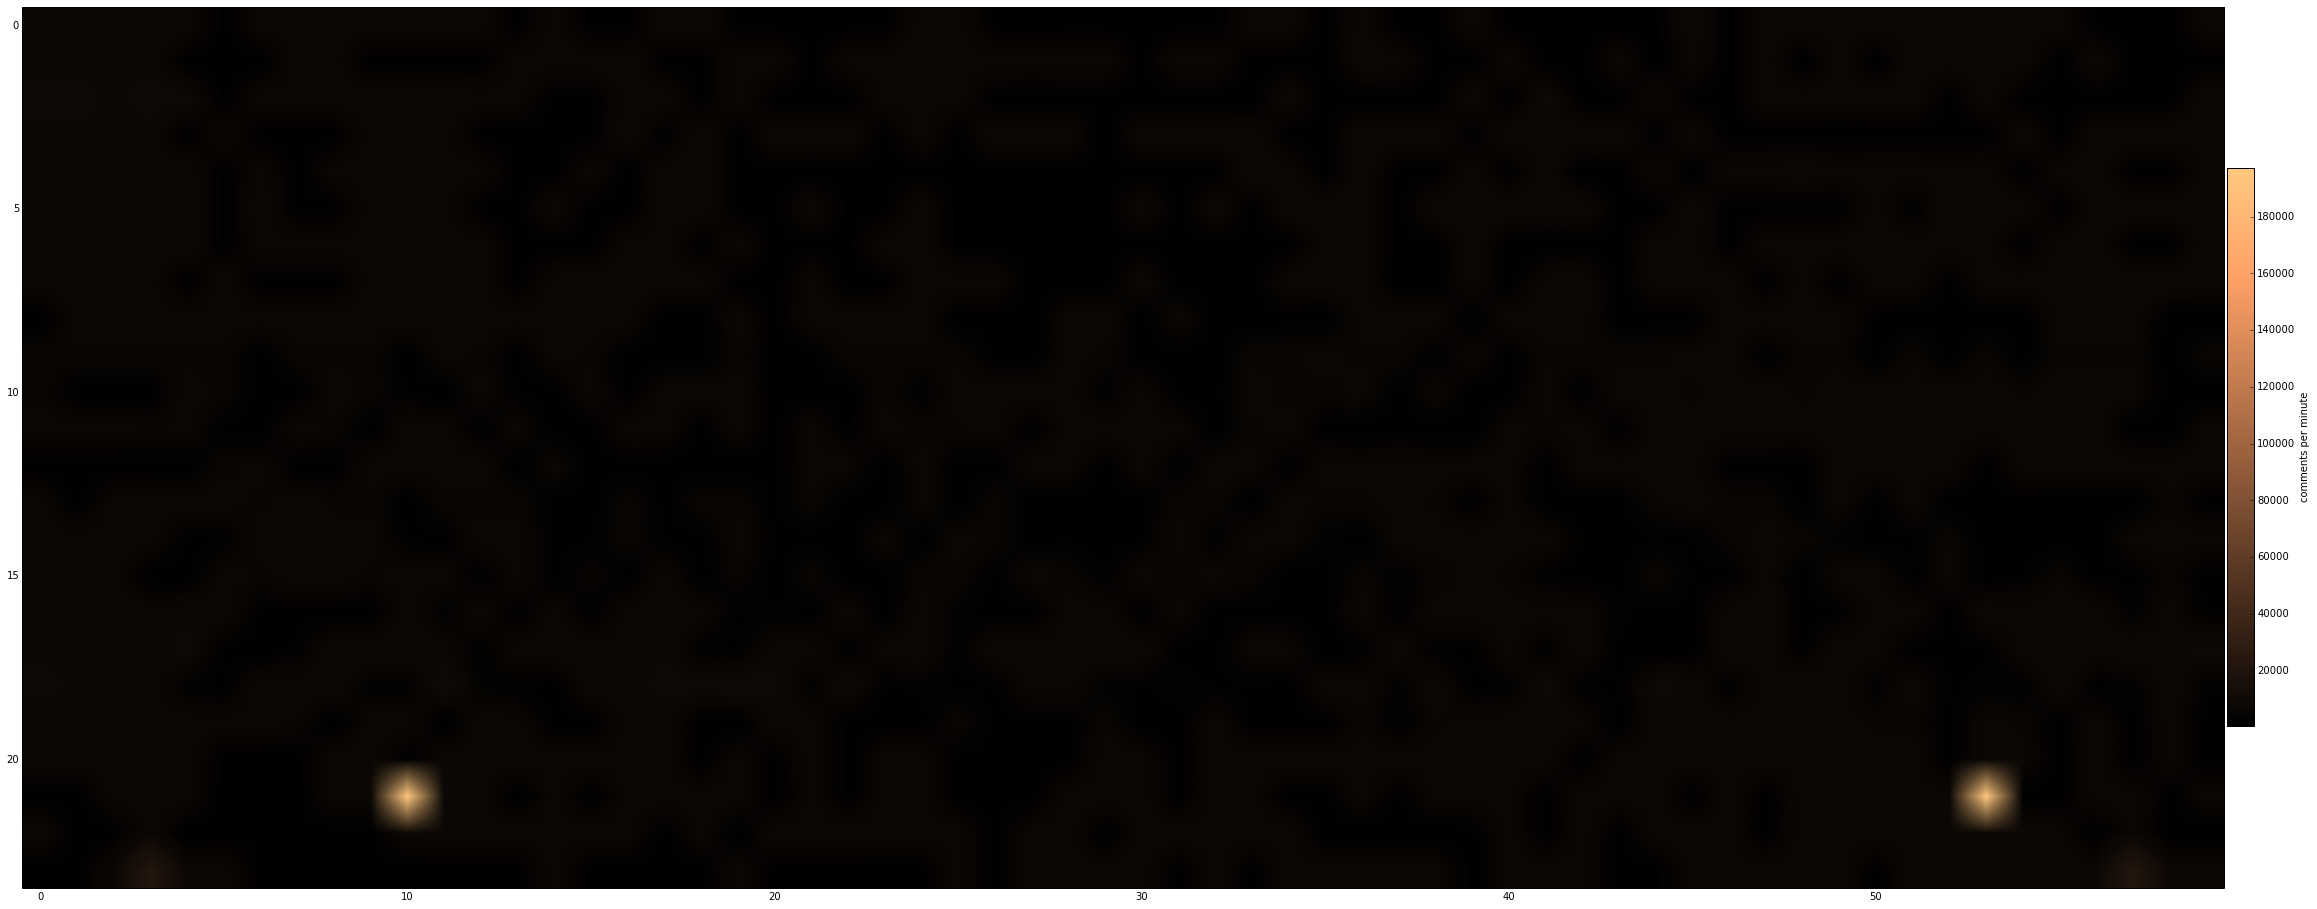

In [41]:

fig, ax = plt.subplots(figsize=(40,40))
ax.grid(False)
plt.imshow(pivoted, origin='upper').set_cmap('copper')
plt.colorbar(fraction=0.0125, pad=0.001, label='comments per minute')
plt.show()